In [18]:
#import Biopython
import Bio as Bio

In [19]:
#import our three important packages
from Bio import SeqIO
from Bio import AlignIO
from Bio import Phylo

In [20]:
#import the sequences we will use. These are 16s sequences from GenBank
#example: https://www.ncbi.nlm.nih.gov/nuccore/FJ039971.1?report=genbank 
t1 = SeqIO.read("sequence1.fasta", "fasta")
t2 = SeqIO.read("sequence2.fasta", "fasta")
t3 = SeqIO.read("sequence3.fasta", "fasta")
t4 = SeqIO.read("sequence4.fasta", "fasta")
t5 = SeqIO.read("sequence5.fasta", "fasta")
t6 = SeqIO.read("sequence6.fasta", "fasta")
t7 = SeqIO.read("sequence7.fasta", "fasta")

In [21]:
#rename each of the sequences 
#this step is not required, it will just make the tree easier to understand 
print(t3.description)
t1.id = 'Loggerhead'
t2.id = 'Hawksbill'
t3.id = 'Leatherback'
t4.id = 'Kemp’s Ridley'
t5.id = 'Flatback'
t6.id = 'Green'
t7.id = 'Olive Ridley'

FJ039914.1 Dermochelys coriacea isolate DC_Atlantic 16S ribosomal RNA gene, partial sequence; mitochondrial


In [22]:
# Combine all of the individual sequences into a new file 
turtles = SeqIO.write([t1,t2,t3,t4,t5,t6,t7], "turtles.fasta", "fasta")

In [23]:
# Load the turtles sequences into MUSCLE 
#https://www.ebi.ac.uk/Tools/msa/muscle/
# Upload the new alignment file to your folder or working directory 

In [24]:
# Open the alignment file as a MultipleSeqAlignment object 
with open("turtles.aln","r") as aln: 
    alignment = AlignIO.read(aln,"clustal")
print(type(alignment))

<class 'Bio.Align.MultipleSeqAlignment'>


In [25]:
# Open and initiate the Distance Calculator using the Identity model 
from Bio.Phylo.TreeConstruction import DistanceCalculator 
calculator = DistanceCalculator('identity')


In [26]:
# Write the Distance Matrix 
distance_matrix = calculator.get_distance(alignment)
print(distance_matrix)

Hawksbill	0
Loggerhead	0.03898305084745768	0
Olive	0.1508474576271186	0.1508474576271186	0
Kemp’s	0.03220338983050852	0.03050847457627115	0.12881355932203387	0
Leatherback	0.07118644067796609	0.07118644067796609	0.18135593220338986	0.06779661016949157	0
Flatback	0.06101694915254241	0.055932203389830515	0.17627118644067796	0.05932203389830504	0.06271186440677967	0
Green	0.1559322033898305	0.15423728813559323	0.12542372881355934	0.15254237288135597	0.14237288135593218	0.12881355932203387	0
	Hawksbill	Loggerhead	Olive	Kemp’s	Leatherback	Flatback	Green


In [27]:
# Open and initiate the Tree Constructor 
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
constructor = DistanceTreeConstructor(calculator)

In [28]:
# Build the tree 
turtle_tree = constructor.build_tree(alignment)
turtle_tree.rooted = True
print(turtle_tree)

Tree(rooted=True)
    Clade(branch_length=0, name='Inner5')
        Clade(branch_length=0.00021186440677970625, name='Inner4')
            Clade(branch_length=0.011016949152542345, name='Inner3')
                Clade(branch_length=0.005014124293785317, name='Inner2')
                    Clade(branch_length=0.025953389830508468, name='Flatback')
                    Clade(branch_length=0.036758474576271204, name='Leatherback')
                Clade(branch_length=0.05812146892655364, name='Inner1')
                    Clade(branch_length=0.057288135593220366, name='Green')
                    Clade(branch_length=0.06813559322033898, name='Olive')
            Clade(branch_length=0.02012711864406782, name='Hawksbill')
        Clade(branch_length=0.01843220338983049, name='Loggerhead')
        Clade(branch_length=0.012076271186440661, name='Kemp’s')


In [29]:
# Save the tree to a new file 
Phylo.write(turtle_tree, "turtle_tree.xml", "phyloxml")

1

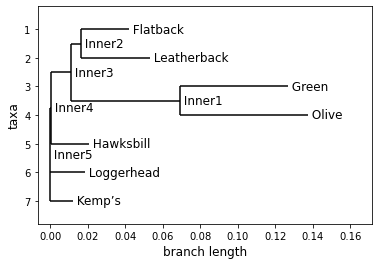

In [30]:
# Import matplotlib and create a basic tree 
import matplotlib
import matplotlib.pyplot as plt
fig = Phylo.draw(turtle_tree)

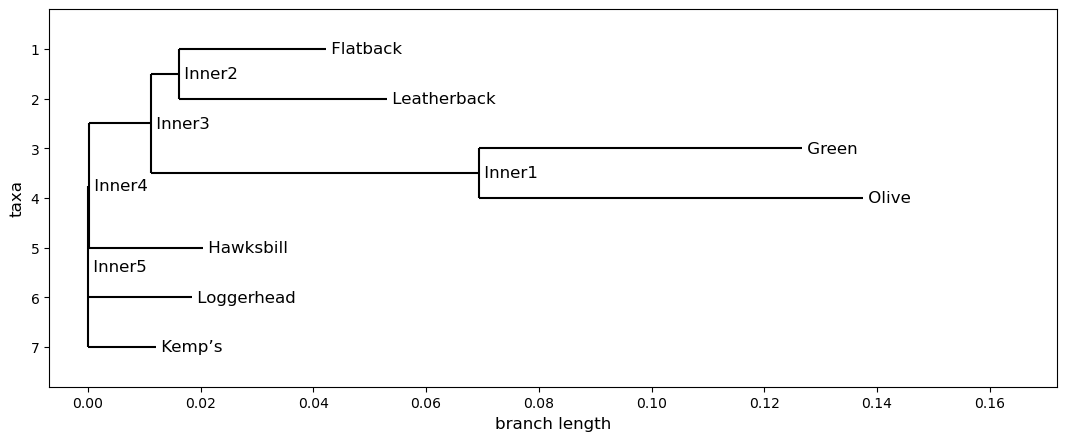

In [34]:
# Make a better looking tree using the features of matplotlib 

fig = plt.figure(figsize=(13, 5), dpi=100) # create figure & set the size 
matplotlib.rc('font', size=12)              # fontsize of the leaf and node labels 
matplotlib.rc('xtick', labelsize=10)       # fontsize of the tick labels
matplotlib.rc('ytick', labelsize=10)       # fontsize of the tick labels
#turtle_tree.ladderize()
axes = fig.add_subplot(1, 1, 1)
Phylo.draw(turtle_tree, axes=axes)
fig.savefig("turtles_cladogram")

In [33]:
# Convert the tree to a different format (optional)
Phylo.convert("turtle_tree.xml", "phyloxml", "turtle_tree.nex", "nexus")

1

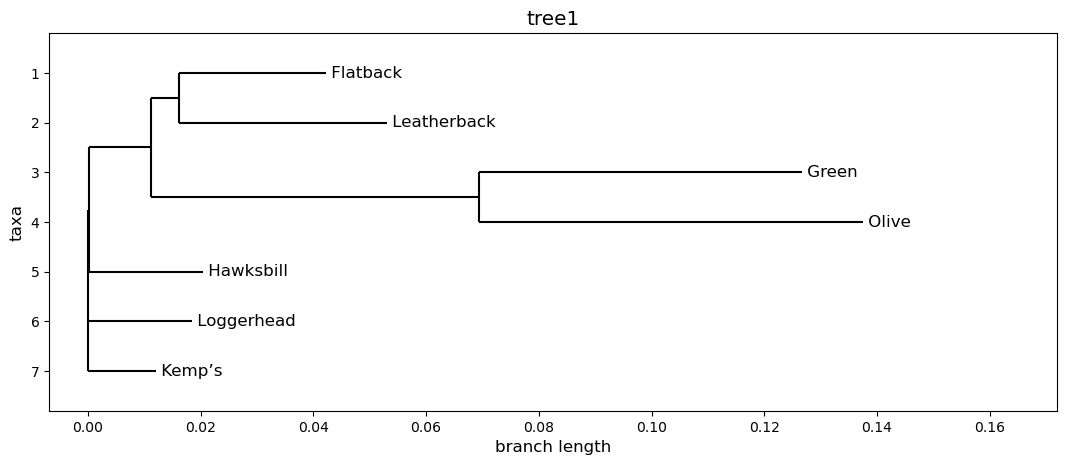

In [32]:

turtle_nex = Phylo.read("turtle_edited.nex", "nexus")

fig = plt.figure(figsize=(13, 5), dpi=100) # create figure & set the size 
matplotlib.rc('font', size=12)              # fontsize of the leaf and node labels 
matplotlib.rc('xtick', labelsize=10)       # fontsize of the tick labels
matplotlib.rc('ytick', labelsize=10)       # fontsize of the tick labels
#turtle_tree.ladderize()
axes = fig.add_subplot(1, 1, 1)
Phylo.draw(turtle_nex, axes=axes)
fig.savefig("turtles2_cladogram")